In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/ref/analysis/pipelines/')
import kang
from matplotlib_venn import venn2, venn3

In [3]:
def infoparse(x):
    key   = [i.split('=')[0] for i in x.split(';')]
    value = [i.split('=')[1] for i in x.split(';')]
    return dict(zip(key,value))

In [4]:
file_cds_new = './finalout/my_csv.csv.addgene.gff3.sort.gff3.cds.fa'
dic_cds_new  = kang.Fasta2dic(file_cds_new)

file_rgff    = './Osativa/annotation/Osativa_323_v7.0.gene.gff3'
df_rgff      = pd.read_csv(file_rgff,sep='\t',comment='#',header=None)
mask         = (df_rgff[2] == 'mRNA')
df_rgff_mRNA = df_rgff[mask]
df_rgff_mRNA['ID'] = df_rgff_mRNA[8].apply(lambda x: infoparse(x)['ID'])
df_rgff_mRNA_ix = df_rgff_mRNA.set_index('ID')

mask         = (df_rgff[2] == 'CDS')
df_rgff_CDS = df_rgff[mask]
df_rgff_CDS['Parent'] = df_rgff_CDS[8].apply(lambda x: infoparse(x)['Parent'])
df_rgff_CDS_ix = df_rgff_CDS.set_index('Parent')


file_tgff    = './finalout/my_csv.csv.addgene.gff3.sort.gff3.merge.all.gff3.sort.gff3'
df_tgff      = pd.read_csv(file_tgff,sep='\t',comment='#',header=None)
mask         = (df_tgff[2] == 'mRNA')
df_tgff_mRNA = df_tgff[mask]
df_tgff_mRNA['ID'] = df_tgff_mRNA[8].apply(lambda x: infoparse(x)['ID'])
df_tgff_mRNA_ix = df_tgff_mRNA.set_index('ID')

mask         = (df_tgff[2] == 'CDS')
df_tgff_CDS = df_tgff[mask]
df_tgff_CDS['Parent'] = df_tgff_CDS[8].apply(lambda x: infoparse(x)['Parent'])
df_tgff_CDS_ix = df_tgff_CDS.set_index('Parent')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

In [15]:
df_rgff_mRNA['Parent'] = df_rgff_mRNA[8].apply(lambda x : infoparse(x)['Parent'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
dic_t2g = dict(zip(df_rgff_mRNA['ID'],df_rgff_mRNA['Parent']))

---
**RNAseq cov analysis matrix**

In [49]:
file_cov = './merged/all.merged.bam.transcripts.all.txt'
df_cov = pd.read_csv(file_cov,sep='\t',header=None)
df_cov.columns = ['transcript','1xcov','10xcov','30xcov','depth.ratio','depth','match','match.ratio']
mask = (df_cov['30xcov'] > 0.9)&(df_cov['match.ratio']>0.9) 
well_cov_transcripts = set(df_cov['transcript'][mask])

----
**Stringtie and ORF annotation matrix**

In [50]:
file_tmap_st = './st_gff_out/cuffcmp.all.merged.bam.stringtie.gff.tmap'
df_tmap_st   = pd.read_csv(file_tmap_st,sep='\t')
file_tmap_td = './predicted/cuffcmp.my_csv.csv.addgene.gff3.sort.gff3.tmap'
df_tmap_td   = pd.read_csv(file_tmap_td,sep='\t')


dic_cds_cre      = kang.Fasta2dic('./Osativa/annotation/Osativa_323_v7.0.cds.fa')
total_transcript = list(set(df_rgff_mRNA['ID']))
df_tmap_st.set_index('ref_id',inplace=True)
df_tmap_td.set_index('ref_id',inplace=True)

dic = {'transcriptname' : [],
       'st.=' : [],
       'st.j' : [],
       'st.c' : [],
       'td.=' : [],
       'td.j' : [],
       'td.c' : [],
       'cov'  : []}

transcriptnames = set([x for x in list(df_tmap_td.index) + list(df_tmap_st.index)  if '-' not in x])
for tn in list(total_transcript):
    dic['transcriptname'].append(tn)
    
    if tn in well_cov_transcripts:
        dic['cov'].append(1)
    else:
        dic['cov'].append(0)
        
    try:
        class_code_st = df_tmap_st.loc[tn]['class_code']
        if isinstance(class_code_st,str):
            class_code_st = [class_code_st]
        else:
            class_code_st = list(class_code_st)
        if '=' in class_code_st:
            dic['st.='].append(1)
        else:
            dic['st.='].append(0)
        if 'j' in class_code_st:
            dic['st.j'].append(1)
        else:
            dic['st.j'].append(0)
        if 'c' in class_code_st:
            dic['st.c'].append(1)
        else:
            dic['st.c'].append(0)
    except KeyError:
        dic['st.='].append(0)
        dic['st.j'].append(0)
        dic['st.c'].append(0)
        
    try:
        class_code_td = df_tmap_td.loc[tn]['class_code']
        if isinstance(class_code_td,str):
            class_code_td = [class_code_td]
        else:
            class_code_td = list(class_code_td)
        if '=' in class_code_td:
            dic['td.='].append(1)
        else:
            dic['td.='].append(0)
        if 'j' in class_code_td:
            dic['td.j'].append(1)
        else:
            dic['td.j'].append(0)
        if 'c' in class_code_td:
            dic['td.c'].append(1)
        else:
            dic['td.c'].append(0)
    except KeyError:
        dic['td.='].append(0)
        dic['td.j'].append(0)
        dic['td.c'].append(0)


df_comp = pd.DataFrame(dic)

In [51]:
## scoring scheme
def get_score(df):
    sm = df['st.=']
    sc = df['st.c']
    sj = df['st.j']
    tm = df['td.=']
    tc = df['td.c']
    tj = df['td.j']
    cov = df['cov']
    
    score = sm*3 + sj*2 + sc*1 + tm*3 + tj*2 + tc*1 + cov*3
    
    return score
    
df_comp['score'] = df_comp.apply(get_score,axis=1)

df_comp['genename'] = df_comp['transcriptname'].apply(lambda x : dic_t2g[x])

df_comp_ix = df_comp.set_index('genename')

df_comp_ix.sortlevel(inplace=True)

In [52]:
df_comp_ix['length'] = df_comp_ix['transcriptname'].apply(lambda x : len(dic_cds_cre[x.replace('.MSUv7.0','')]))
df_comp_ix.head()

,cov,st.=,st.c,st.j,td.=,td.c,td.j,transcriptname,score,length
genename,,,,,,,,,,
ChrSy.fgenesh.gene.1.MSUv7.0,0,0,0,0,0,0,0,ChrSy.fgenesh.mRNA.1.MSUv7.0,0,384
ChrSy.fgenesh.gene.10.MSUv7.0,0,0,0,0,0,0,0,ChrSy.fgenesh.mRNA.10.MSUv7.0,0,1692
ChrSy.fgenesh.gene.11.MSUv7.0,0,0,0,0,0,0,0,ChrSy.fgenesh.mRNA.11.MSUv7.0,0,249
ChrSy.fgenesh.gene.12.MSUv7.0,0,0,0,0,0,0,0,ChrSy.fgenesh.mRNA.12.MSUv7.0,0,4860
ChrSy.fgenesh.gene.13.MSUv7.0,0,0,0,0,0,0,0,ChrSy.fgenesh.mRNA.13.MSUv7.0,0,1671


In [53]:
df_comp_ix.to_csv('final.comp.txt',sep='\t')

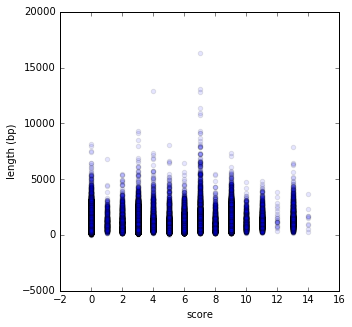

In [54]:
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(df_comp_ix['score'],df_comp_ix['length'],alpha='0.1')
plt.xlabel('score')
plt.ylabel('length (bp)')
#plt.ylim(1000,80000)
plt.savefig('length2score.png',dpi=300,bbox_inches='tight' )


In [55]:
def ismem(x,inset):
    if x in inset:
        return True
    else: return False

mask          = (df_comp['score'] == 0 )
num_ref_trans_not_evi = len(df_comp[mask])
nonzero_genes = set(df_comp[~mask]['genename']) # retriving genenames with non-zero score
mask          = df_comp['genename'].apply(lambda x : ismem(x,nonzero_genes)) 
df_comp_zero  = df_comp[~mask] # retrieve df with zero genes 
num_ref_gene_not_evi = len(set(df_comp_zero['genename'])) # Reference genes not evidenced by ST or ORFA
print 'Reference trans not evidenced by ST or ORFA or RNAcov', num_ref_trans_not_evi
print 'Reference genes not evidenced by ST or ORFA or RNAcov', num_ref_gene_not_evi

Reference trans not evidenced by ST or ORFA or RNAcov 19512
Reference genes not evidenced by ST or ORFA or RNAcov 16346


In [56]:
# number of completely matched transcripts based on stringtie and ORF annotation
mask = (df_comp['st.='].astype(int) == 1) | (df_comp['td.='].astype(int) == 1)
comp_match_transname = df_comp[mask]['transcriptname']
comp_match_genesname = list(set(df_comp[mask]['genename']))
num_ref_trans_comp_ST_ORFA = len(comp_match_transname)
num_ref_genes_comp_ST_ORFA = len(comp_match_genesname)
print 'completely matched reference trans by stringtie or ORFA', num_ref_trans_comp_ST_ORFA
print 'completely matched referece genes by stringtie or ORFA', num_ref_genes_comp_ST_ORFA

completely matched reference trans by stringtie or ORFA 18338
completely matched referece genes by stringtie or ORFA 17036


In [57]:
# well supported list by '=','j','c'  based on stringtie and ORF annotation 
def support(x):
    if x in ['=','j','c']:
        return True
    else:
        return False
mask      = df_tmap_st['class_code'].apply(support)
st_supp   = df_tmap_st[mask].index
mask      = df_tmap_td['class_code'].apply(support)
td_supp   = df_tmap_td[mask].index
supp_list = set([x for x in list(st_supp) + list(td_supp) if '-' not in x])
ref_trans_evi_ST_ORFA = len(list(supp_list))
print 'Reference transcripts evidenced by ST or ORFA', ref_trans_evi_ST_ORFA

supp_list_gene = set(['.'.join(x.split('.')[0:2]) for x in list(supp_list)])
ref_genelist   = set(['.'.join(x.split('.')[0:2]) for x in dic_cds_cre.keys()])
ref_genes_evi_ST_ORFA = len(ref_genelist-supp_list_gene)
print 'Reference genes not evidenced by ST or ORFA', ref_genes_evi_ST_ORFA

Reference transcripts evidenced by ST or ORFA 25445
Reference genes not evidenced by ST or ORFA 26830


In [58]:
df_comp.head()

,cov,st.=,st.c,st.j,td.=,td.c,td.j,transcriptname,score,genename
0,0,1,0,0,1,0,0,LOC_Os11g16260.1.MSUv7.0,6,LOC_Os11g16260.MSUv7.0
1,1,1,0,0,1,0,0,LOC_Os04g09720.2.MSUv7.0,9,LOC_Os04g09720.MSUv7.0
2,1,1,0,1,1,0,1,LOC_Os07g44660.1.MSUv7.0,13,LOC_Os07g44660.MSUv7.0
3,1,1,0,0,1,0,0,LOC_Os09g32150.1.MSUv7.0,9,LOC_Os09g32150.MSUv7.0
4,0,0,0,0,0,0,0,LOC_Os11g35370.1.MSUv7.0,0,LOC_Os11g35370.MSUv7.0


In [59]:
mask  = (df_comp['td.='].astype(int) == 1)
td_cm = set(df_comp[mask]['transcriptname'])
mask  = (df_comp['st.='].astype(int) == 1)
st_cm = set(df_comp[mask]['transcriptname'])

ref_trans_comp_ST   = len(st_cm)
ref_trans_comp_ORFA = len(td_cm)
print 'Reference transcipts completely matched by stringtie',ref_trans_comp_ST
print 'Reference transcipts completely matched by ORF annotation',ref_trans_comp_ORFA

Reference transcipts completely matched by stringtie 17590
Reference transcipts completely matched by ORF annotation 14058


In [60]:
num_trans_predicted_ST = len(set(df_tmap_st['cuff_id']))
num_trans_predicted_ORFA = len(set(df_tmap_td['cuff_id']))
print num_trans_predicted_ST,num_trans_predicted_ORFA

56607 27719


In [61]:
total_reference_transcripts = len(dic_cds_cre.keys())
dic_result = {'total reference transcript' : [total_reference_transcripts],
              'stringtie predicted transcripts' : [num_trans_predicted_ST],
              'reference transcripts completely supported by stringtie' : [ref_trans_comp_ST],
              'ORF annotation predicted transcripts' : [num_trans_predicted_ORFA],
              'reference transcripts completely supported by ORF annotation' : [ref_trans_comp_ORFA],
              'total reference transcripts completely supported by stringtie or ORF annotation' : [num_ref_trans_comp_ST_ORFA],
              'total reference genes completely supported by stringtie or ORF annotation' : [num_ref_genes_comp_ST_ORFA],
              'reference transcripts evidenced by stringtie or ORF annotation' : [ref_trans_evi_ST_ORFA],
              'reference transcripts not evidenced by stringtie or ORF annotation' : [total_reference_transcripts - ref_trans_evi_ST_ORFA],
              'reference genes not evidenced by stringtie or ORF annotation' : [ref_genes_evi_ST_ORFA],
              'reference transcripts not evidenced by stringtie or ORF annotation or RNAcov' : [num_ref_trans_not_evi],
              'reference genes not evidenced by stringtie or ORF annotation or RNAcov' : [num_ref_gene_not_evi]
             }
df_result = pd.DataFrame(dic_result)

df_result.T

,0
ORF annotation predicted transcripts,27719
reference genes not evidenced by stringtie or ORF annotation,26830
reference genes not evidenced by stringtie or ORF annotation or RNAcov,16346
reference transcripts completely supported by ORF annotation,14058
reference transcripts completely supported by stringtie,17590
reference transcripts evidenced by stringtie or ORF annotation,25445
reference transcripts not evidenced by stringtie or ORF annotation,26979
reference transcripts not evidenced by stringtie or ORF annotation or RNAcov,19512
stringtie predicted transcripts,56607
total reference genes completely supported by stringtie or ORF annotation,17036


----
**split and start/codon changes**

In [62]:
df_tmap_td.reset_index(inplace=True)

In [63]:
mask     = (df_tmap_td['class_code'] == '=')
genes_fs = set(df_tmap_td[mask]['ref_gene_id'])
trans_fs = set(df_tmap_td[mask]['ref_id'])
print ('same',len(mask.nonzero()[0]), len(genes_fs), len(trans_fs))

mask = (df_tmap_td['class_code'] == 'c')
genes_ps = set(df_tmap_td[mask]['ref_gene_id'])
trans_ps = set(df_tmap_td[mask]['ref_id'])
print ('part support', len(mask.nonzero()[0]), len(genes_ps), len(trans_ps))

mask = (df_tmap_td['class_code'] == 'j')
genes_is = set(df_tmap_td[mask]['ref_gene_id'])
trans_is = set(df_tmap_td[mask]['ref_id'])
print ('isoforms', len(mask.nonzero()[0]), len(genes_is), len(trans_is))

mask = (df_tmap_td['class_code'] == 'u')
print ('new', len(mask.nonzero()[0]))

df_result['number of new transcripts'] = len(mask.nonzero()[0])

('same', 14500, 13453, 14058)
('part support', 3935, 3217, 3241)
('isoforms', 6441, 4998, 4998)
('new', 1143)


In [64]:
dicR2C = {} # reference id to cuff_id , reference id correspond to multiple cuff_id
dicR2cuffid = {}
for i in df_tmap_td.index:
    ref_id     = df_tmap_td.loc[i]['ref_id']
    cuff_id    = df_tmap_td.loc[i]['cuff_id']
    class_code = df_tmap_td.loc[i]['class_code']
    
    atg_bool   = dic_cds_new[cuff_id][0:3] == 'ATG'
    if ref_id in trans_is - trans_fs - trans_ps and class_code == 'j':
        pass
    else:
        continue
    #print ref_id
    rid_cov = np.arange(np.min(df_rgff_CDS_ix.loc[ref_id][[3,4]].values),np.max(df_rgff_CDS_ix.loc[ref_id][[3,4]].values)+1)
    tid_cov = np.arange(np.min(df_tgff_CDS_ix.loc[cuff_id][[3,4]].values),np.max(df_tgff_CDS_ix.loc[cuff_id][[3,4]].values)+1)
    try:
        dicR2C[ref_id].append(tid_cov)
    except KeyError:
        dicR2C[ref_id] = [rid_cov,tid_cov]
        #dicR2C[ref_id] = [tid_cov]
    try:
        dicR2cuffid[ref_id].append([cuff_id,atg_bool])
    except KeyError:
        dicR2cuffid[ref_id] = [[cuff_id,atg_bool]]
    #ref_id_len = len(dicfa[ref_id.replace('.v5.5','')])
    #cuff_id_len = len(diccds[cuff_id])
    #comp =  float(ref_id_len) / cuff_id_len 
    #if comp > 2 or comp < 0.5: 
    #    result.append( cuff_id)
        

In [65]:
split    = []
split2   = []
extended = []
changed_shrink  = []
changed_extend  = []
for key in dicR2C:
    ref_set       = set(dicR2C[key][0])
    t_set_list    = [set(x) for x in dicR2C[key][1:]]
    t_set_list.sort(key=lambda x : len(x),reverse=True)
    try:
        longest_t_set = t_set_list[0]
    except IndexError:
        continue
    
    ## SPLIT Gather
    final_set     = ref_set
    for t_set in t_set_list:
        if len((ref_set & t_set)) == 0:
            continue
        final_set = final_set & t_set
    if len(final_set) == 0:
        split.append(key)
    ## SPLIT Gather END
    
    
    ## START and END change
    start = np.min(df_rgff_CDS_ix.loc[key][[3,4]].values)
    end   = np.max(df_rgff_CDS_ix.loc[key][[3,4]].values)
    b = 1
    for t_set in t_set_list:
        if start not in (ref_set - t_set) and end not in (ref_set - t_set):
            b = 0
    if b == 1:
        changed_shrink.append(key)
        
    b = 1 
    for t_set in t_set_list:
        if start-1 not in (t_set - ref_set) and end+1 not in (t_set - ref_set):
            b = 0
    if b == 1:
        changed_extend.append(key)

In [66]:
num_split   = len(split)
num_shrink  = len(changed_shrink)
list_extend = list(set(changed_extend) - set(changed_shrink))
num_extend = len(list_extend)

In [67]:
df_result['reference transcripts, predicted to be split']  = num_split
df_result['reference transcripts, predicted to be shrink changing start or stop codon'] = num_shrink
df_result['reference transcripts, predicted to be extended changing start or stop codon'] = num_extend

In [68]:
df_result.T

,0
ORF annotation predicted transcripts,27719
reference genes not evidenced by stringtie or ORF annotation,26830
reference genes not evidenced by stringtie or ORF annotation or RNAcov,16346
reference transcripts completely supported by ORF annotation,14058
reference transcripts completely supported by stringtie,17590
reference transcripts evidenced by stringtie or ORF annotation,25445
reference transcripts not evidenced by stringtie or ORF annotation,26979
reference transcripts not evidenced by stringtie or ORF annotation or RNAcov,19512
stringtie predicted transcripts,56607
total reference genes completely supported by stringtie or ORF annotation,17036


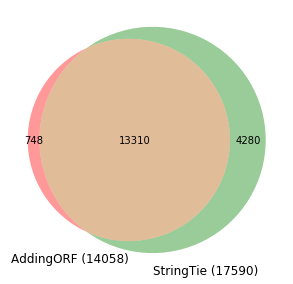

In [43]:
# venn for transcripts that are completely supported venn2
plt.rcParams['figure.figsize'] = (5,5)
venn2([td_cm,st_cm], ('AddingORF (%d)'%len(td_cm),'StringTie (%d)'%len(st_cm)))
plt.savefig('venn.orf.st.venn2.trans.png',dpi=400)

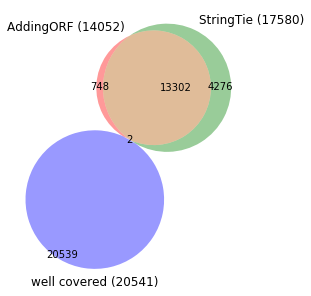

In [44]:
# venn3 for completely supported genes
td_cm_g = set(['.'.join(x.split('.')[0:2]) for x in list(td_cm)])
st_cm_g = set(['.'.join(x.split('.')[0:2]) for x in list(st_cm)])
well_cov_transcripts_g = set(['.'.join(x.split('.')[0:2]) for x in list(well_cov_transcripts)])
venn3([td_cm_g,st_cm_g,well_cov_transcripts_g], ('AddingORF (%d)'%len(td_cm_g),'StringTie (%d)'%len(st_cm_g),'well covered (%d)'%len(well_cov_transcripts_g)))
plt.savefig('venn.orf.st.gene.png',dpi=400)

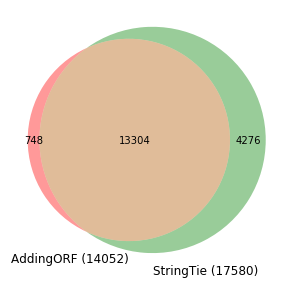

In [45]:
# venn for genes venn2
plt.rcParams['figure.figsize'] = (5,5)
venn2([td_cm_g,st_cm_g], ('AddingORF (%d)'%len(td_cm_g),'StringTie (%d)'%len(st_cm_g)))
plt.savefig('venn.orf.st.venn2.gene.png',dpi=400)

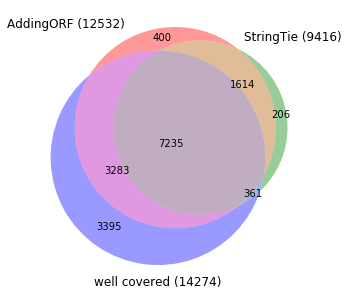

In [36]:
# venn for transcripts

plt.rcParams['figure.figsize'] = (5,5)
venn3([td_cm,st_cm,well_cov_transcripts], ('AddingORF (%d)'%len(td_cm),'StringTie (%d)'%len(st_cm),'well covered (%d)'%len(well_cov_transcripts)))
plt.savefig('venn.orf.st.trans.png',dpi=400)

In [47]:
total_gene = set(['.'.join(x.split('.')[0:2]) for x in total_transcript])
supp_list_g = set(['.'.join(x.split('.')[0:2]) for x in supp_list])
no_supp_list = (total_gene - supp_list_g)



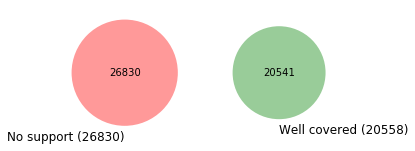

In [48]:
# venn for gene venn2
plt.rcParams['figure.figsize'] = (5,5)
venn2([no_supp_list,well_cov_transcripts_g], ('No support (%d)'%len(no_supp_list),'Well covered (%d)'%len(well_cov_transcripts)))
plt.savefig('venn.orf.nosupp.venn2.gene.png',dpi=400)

In [72]:
common = (no_supp_list & well_cov_genes_g)
mask = df_tmap_st.reset_index()['ref_id'].apply(lambda x : '.'.join(x.split('.')[0:2]) in common)
from collections import Counter
dicCount = Counter(df_tmap_st.reset_index()[mask]['class_code'])
len(set(df_tmap_st.reset_index()[mask]['ref_gene_id']))

NameError: name 'no_supp_list' is not defined

In [ ]:
len(set(['.'.join(x.split('.')[0:2]) for x in list(total_transcript-supp_list)]))

,cov,st.=,st.c,st.j,td.=,td.c,td.j,transcriptname,score,genename
0,1,0,0,0,1,0,0,Cre15.g636750.t1.2.v5.5,6,Cre15.g636750
1,1,1,1,0,1,1,0,Cre09.g390393.t1.1.v5.5,11,Cre09.g390393
2,1,1,0,0,1,0,0,Cre02.g076250.t1.1.v5.5,9,Cre02.g076250
3,1,0,0,1,1,0,0,Cre09.g400664.t1.1.v5.5,8,Cre09.g400664
4,0,0,0,0,0,0,0,Cre05.g234000.t2.1.v5.5,0,Cre05.g234000


In [53]:
df_comp_zero.head()

,cov,st.=,st.c,st.j,td.=,td.c,td.j,transcriptname,score,genename
4,0,0,0,0,0,0,0,Cre05.g234000.t2.1.v5.5,0,Cre05.g234000
5,0,0,0,0,0,0,0,Cre03.g146147.t1.1.v5.5,0,Cre03.g146147
18,0,0,0,0,0,0,0,Cre06.g302551.t1.1.v5.5,0,Cre06.g302551
28,0,0,0,0,0,0,0,Cre17.g733050.t2.1.v5.5,0,Cre17.g733050
50,0,0,0,0,0,0,0,Cre12.g485632.t1.2.v5.5,0,Cre12.g485632


In [54]:
zero_genes = set(df_comp_zero['genename'])

In [55]:
venn_zeros = set(no_supp_list-well_cov_transcripts_g)

In [56]:
list(zero_genes - venn_zeros)[0:10]

[]

In [57]:
len(zero_genes)

1729